# Vehicle_Dataset_Practice

Bu Veri Seti Kullanilmis Arabalar Hakkinda Bilgi Icerir.
Bu Veriler, Makine Ogreniminde Dogrusal Regresyon Kullanimini Orneklemek Icin Fiyat Tahmini Gibi Bircok Amac Icin Kullanilabilir.



#### Verilen Veri Kumesindeki Sutunlar Asagidaki Gibidir:
* name : Aracin Ismi
* year : Uretim Yili
* selling_price : Satis Fiyati
* km_driven : Aracin Km'si
* fuel : Yakit Degeri
* seller_type : Satici Tipi
* transmission : Aktarma
* Owner : Kacinci Sahip

In [1]:
# Kutuphaneleri Ekleme Islemi

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Veri Setini Import Islemi

df = pd.read_csv("../input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")

# Keşifsel Veri Analizi (EDA)

In [3]:
# Veri Setimizin Ilk 5 Satirini Gozlenmektedir ( Fonksiyonda Varsayilan Olarak 5 Degeri Vardir )

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Veri Setinin Son 5 Satirini Gozlenmektedir ( Fonksiyonda Varsayilan Olarak 5 Degeri Vardir )

df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.columns # Sutunlar ( Degiskenler )

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
# Veri Setinin Boyutu ( Dizi Kac'a Kaclik Sorusuna Cevap Verir )

df.shape

(4340, 8)

In [7]:
df.ndim # Kaç Boyutlu Oldugu Gozlenmektedir

2

In [8]:
df.mean() # Butun Degiskenlerin Ortalama Degerlerini Verir

year               2013.090783
selling_price    504127.311751
km_driven         66215.777419
dtype: float64

In [9]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [10]:
# df.name ------->> df Icerisinden Degisken Seciyodu

# pd.Categorical(df.name) ------->> Bu Ifade De Kategorik Olarak Tanimla Demektir

df.name = pd.Categorical(df.name)

In [11]:
df.dtypes # Gorulecegi Uzere Degisken Tipinde Kategorik Olarak Degistirme Islemi Yapildi

name             category
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
dtype: object

## Missing Value Analysis

In [12]:
# Degiskenlerin Icerisinde     ---   Hiç Eksik Gozlem (Deger) Var mi?   ---- ( Sorusu Soruldu )

# df ------->> Veri Seti

# .isnull()   ------>>  Sorgulama

# df.isnull()   ------>>  Veri Setinde Sorgulama Yapti

# .values   ------>>  Nerede ?   ------>>  Degerler Uzerinde ( Degerlere Yonelik )

# .any()   ------>>  Herhangi Birisinde ( Bir Tane Bile Varsa ) "True" Olarak Deger Dondur

df.isnull().values.any() # Ciktida Gorulecegi Uzere Veri Setinde Bos Gozlem Yoktur

False

In [13]:
# Eger Degiskenlerde Eksik Degerler Var Olsaydi Hangi Degiskende Kacar Tane Bos Gozlem Olucakti? ( Sorusuna Cevap Verir )

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
df.info() # Ciktida Veri Setinde Hic Bos Goz Olmadigi Gozlenmektedir

"""
Eger Eksik Gozlem Tespit Etseydik, dropna() Fonksiyonu Dataset'teki Eksik Gozlemleri Cikarmaya Yarar,
Eger Bos Gozleri Doldurulmak Istenseydi fillna() Fonksiyonu Kullanilabilirdi

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   category
 1   year           4340 non-null   int64   
 2   selling_price  4340 non-null   int64   
 3   km_driven      4340 non-null   int64   
 4   fuel           4340 non-null   object  
 5   seller_type    4340 non-null   object  
 6   transmission   4340 non-null   object  
 7   owner          4340 non-null   object  
dtypes: category(1), int64(3), object(4)
memory usage: 289.9+ KB


"\nEger Eksik Gozlem Tespit Etseydik, dropna() Fonksiyonu Dataset'teki Eksik Gozlemleri Cikarmaya Yarar,\nEger Bos Gozleri Doldurulmak Istenseydi fillna() Fonksiyonu Kullanilabilirdi\n\n"

In [15]:
# Istatistiksel Fonksiyonlarin "selling_price" Degiskeninde Kullanimi

print("Ortalamasi : {0}\nSayisi : {1}\nMin : {2}\nMax : {3}\nToplami : {4}\nStandart Sapmasi : {5}\nVaryansi : {6}".format(
df["selling_price"].mean(),
df["selling_price"].count(),
df["selling_price"].min(),
df["selling_price"].max(),
df["selling_price"].sum(),
df["selling_price"].std(),
df["selling_price"].var()))

Ortalamasi : 504127.3117511521
Sayisi : 4340
Min : 20000
Max : 8900000
Toplami : 2187912533
Standart Sapmasi : 578548.7361388865
Varyansi : 334718640087.90295


In [16]:
df.describe().T # Istatistikler ( Transpozu Alinmis Haldedir )

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [17]:
df.groupby("name").mean().head(10).T # Araba Isimlerine Gore Grupladiktan Sonra Ortalamasi Alindi,Ilk 10 Gozlemi Getir Denildi Ve Transpoz'u Alindi

name,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 3.0 TDI Quattro,Audi A4 30 TFSI Technology,Audi A4 35 TDI Premium,Audi A4 35 TDI Premium Plus
year,2005.0,2002.0,2012.0,2012.0,2011.0,2013.0,2013.0,2018.0,2015.0,2019.0
selling_price,120000.0,50000.0,430000.0,1200000.0,1295000.0,1150000.0,1580000.0,3100000.0,2300000.0,3256000.0
km_driven,50000.0,120000.0,50000.0,60000.0,58000.0,53000.0,86000.0,22000.0,35000.0,17000.0


In [18]:
# Araba Isimlerine Gore Gruplandirdik Ve selling_price Degiskeninin Ortalamasini Aldik Ve Ilk 5 Gozlemi Ekranda Gosterdik

df.groupby("name")["selling_price"].mean().head()

name
Ambassador CLASSIC 1500 DSL AC           120000.0
Ambassador Classic 2000 Dsz               50000.0
Ambassador Grand 1800 ISZ MPFI PW CL     430000.0
Audi A4 1.8 TFSI                        1200000.0
Audi A4 2.0 TDI                         1295000.0
Name: selling_price, dtype: float64

In [19]:
df.name.unique() # Katagori Siniflari

['Maruti 800 AC', 'Maruti Wagon R LXI Minor', 'Hyundai Verna 1.6 SX', 'Datsun RediGO T Option', 'Honda Amaze VX i-DTEC', ..., 'Maruti Swift LDI', 'Tata Nano XM', 'Mahindra Verito 1.5 D6 BSIII', 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV', 'Hyundai i20 Magna 1.4 CRDi']
Length: 1491
Categories (1491, object): ['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz', 'Ambassador Grand 1800 ISZ MPFI PW CL', 'Audi A4 1.8 TFSI', ..., 'Volvo V40 D3 R Design', 'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic', 'Volvo XC60 D5 Inscription']

In [20]:
df["name"].value_counts().count() # Katagori Siniflarinin Sayisi

1491

In [21]:
# Katagorik Siniflarin Hangisinden Kacar Tane Var ? ( Yani Frekanslari Nedir ?)

df["name"].value_counts().head(15)

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Hyundai EON Era Plus        35
Maruti Alto LX              35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Maruti Wagon R LXI Minor    24
Hyundai EON Magna Plus      24
Maruti Wagon R LXI          23
Maruti 800 AC               23
Hyundai i10 Magna           22
Mahindra XUV500 W8 2WD      22
Maruti Ritz VDi             22
Name: name, dtype: int64

# Gorsellestirme Islemleri

* .plot  -----> Pandas'in Bir Fonksiyonudur
* .barh()  -----> Bize Sutun Grafigi Verir

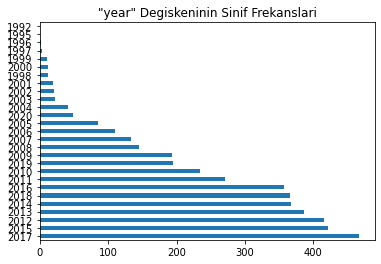

In [22]:
df["year"].value_counts().plot.barh().set_title("\"year\" Degiskeninin Sinif Frekanslari"); # "year" AdliDegiskenin Icerisindeki Siniflar Grafige Yansitilmistir

# Yorum : Gecmisten Gunumuze Yaklastikca Veri Seti Icerisindeki Gozlenen Araba Sayisinin Arttigi Gozlenmektedir Ve Ayrica 2014 Yilinda Diger Yillara Oranla Daha Fazla Araba Sayisi Ciktigi Gozlenmektedir

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


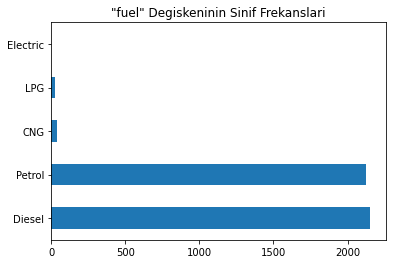

In [24]:
df["fuel"].value_counts().plot.barh().set_title("\"fuel\" Degiskeninin Sinif Frekanslari"); # Yorum ; Petrol Ve Diesel Ile Calisan Arac Sayisi 2000'in Uzerindeyken Diger Araclarin Sayisi Cok Az
# Oldugu Gozlenmektedir

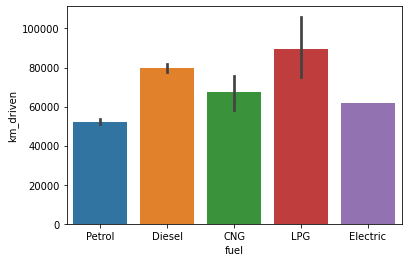

In [25]:
sns.barplot(x = "fuel", y = df.km_driven, data = df); # X Eksenine "fuel" Adli Katagorik Degiskeninin Frekanslarini Koyduk, Y Eksenine Km Degerlerini Koydum

# Yorum ; LPG Digerlerine Oranla Daha Fazla Oldugu Gozlenmektedir

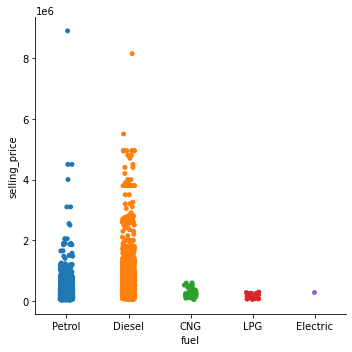

In [26]:
sns.catplot(x = "fuel", y = "selling_price", data = df); # Yorum ; Dizel Araclarin Diger Araclara Oranla Daha Pahali Fiyatlara Satildigini Gormekteyiz

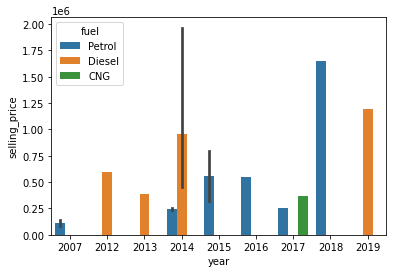

In [27]:
sns.barplot(x = "year", y = "selling_price", hue = "fuel", data = df.head(30)); # 3 Degiskeni Grafikte Gosterdik
# Yorum ; 2018 Yilinda Petrol Ile Calisan Araclarin Diger Araclara Oranla Daha Fazla Oldugu Gozlenmektedir

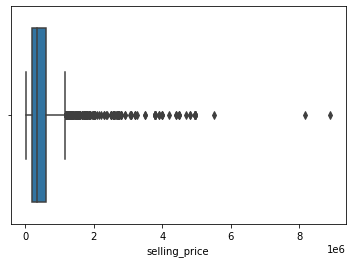

In [28]:
sns.boxplot(x = df.selling_price); # Satis Fiyatlari Gorsellestirilmistir

# Yorum ; Bircok Degerin Aykiri Deger Oldugu Gozlenmektedir